<a href="https://colab.research.google.com/github/Niihaad/ML_Algorithms/blob/main/FingerPrintDetection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
The_right_Fingerprint = os.listdir('/content/Right_Fingerprint')
print(The_right_Fingerprint[0:5])
print(The_right_Fingerprint[-5:])

['IMG-20240123-WA0012.jpg', 'IMG-20240123-WA0010.jpg', 'IMG-20240123-WA0019.jpg', 'IMG-20240123-WA0005.jpg', 'IMG-20240123-WA0008.jpg']
['doigt2.jpg', 'IMG-20240123-WA0018.jpg', 'IMG-20240123-WA0009.jpg', 'doigt3.jpg', 'IMG-20240123-WA0017.jpg']


In [ ]:
the_Wrong_Fingerprint = os.listdir('/content/Wrong_Fingerprint')
print(the_Wrong_Fingerprint[0:5])
print(the_Wrong_Fingerprint[-5:])

['104__M_Right_thumb_finger.dib', '100__M_Left_ring_finger_CR.dib', '100__M_Left_middle_finger.dib', '100__M_Left_index_finger_Zcut.dib', '100__M_Right_little_finger_CR3.dib']
['103__F_Left_index_finger.dib', '102__M_Right_thumb_finger.dib', '101__M_Left_ring_finger.dib', '103__F_Right_ring_finger.dib', '100__M_Left_index_finger_CR.dib']


In [ ]:
print('Number of The_right_Fingerprint :', len(The_right_Fingerprint))
print('Number of the_Wrong_Fingerprint :', len(the_Wrong_Fingerprint))

Number of The_right_Fingerprint : 21
Number of the_Wrong_Fingerprint : 18


In [ ]:
# create the labels

with_right_Fingerprint = [1]*21

with_Wrong_Fingerprint = [0]*18

In [ ]:
print(with_right_Fingerprint[0:5])

print(with_Wrong_Fingerprint[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_right_Fingerprint))
print(len(with_Wrong_Fingerprint))

21
18


In [ ]:
labels = with_right_Fingerprint + with_Wrong_Fingerprint

print(len(labels))
print(labels[0:5])
print(labels[-5:])

39
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


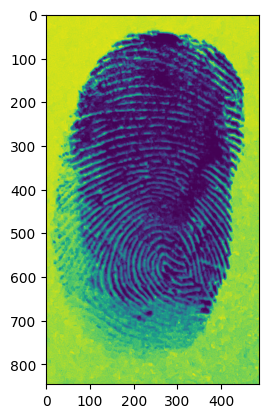

In [ ]:
# displaying with right_Fingerprint
img = mpimg.imread('/content/testFolder/doigt1.jpg')
imgplot = plt.imshow(img)
plt.show()

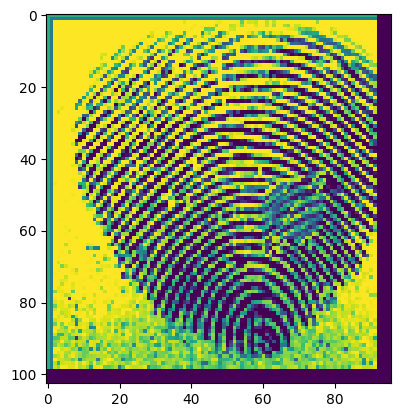

In [ ]:
# displaying  with Wrong_Fingerprint
img = mpimg.imread('/content/testFolder/100__M_Right_ring_finger_ZcutPredict.dib')
imgplot = plt.imshow(img)
plt.show()

                                      STEP 2 : Image Processing


1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+
RPath = '/content/Right_Fingerprint/'

data = []

for img_file in The_right_Fingerprint:
    image = Image.open(RPath + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

WPath = '/content/Wrong_Fingerprint/'


for img_file in the_Wrong_Fingerprint:

  image = Image.open(WPath + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


In [ ]:
type(data)

list

In [ ]:
len(data)

39

In [ ]:
data[0]

array([[[187, 187, 187],
        [192, 192, 192],
        [196, 196, 196],
        ...,
        [190, 190, 190],
        [189, 189, 189],
        [189, 189, 189]],

       [[187, 187, 187],
        [187, 187, 187],
        [191, 191, 191],
        ...,
        [189, 189, 189],
        [188, 188, 188],
        [187, 187, 187]],

       [[193, 193, 193],
        [190, 190, 190],
        [193, 193, 193],
        ...,
        [186, 186, 186],
        [189, 189, 189],
        [189, 189, 189]],

       ...,

       [[191, 191, 191],
        [197, 197, 197],
        [196, 196, 196],
        ...,
        [199, 199, 199],
        [201, 201, 201],
        [202, 202, 202]],

       [[195, 195, 195],
        [196, 196, 196],
        [194, 194, 194],
        ...,
        [196, 196, 196],
        [202, 202, 202],
        [203, 203, 203]],

       [[196, 196, 196],
        [199, 199, 199],
        [199, 199, 199],
        ...,
        [201, 201, 201],
        [203, 203, 203],
        [196, 196, 196]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(39, 128, 128, 3)
(39,)


In [ ]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(39, 128, 128, 3) (31, 128, 128, 3) (8, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

# Building the Neural network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.1392 - acc: 0.9167 - val_loss: 0.0616 - val_acc: 1.0000
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.0936 - acc: 0.9583 - val_loss: 0.0319 - val_acc: 1.0000
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 0.0586 - acc: 1.0000 - val_loss: 0.0187 - val_acc: 1.0000
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 0.0521 - acc: 1.0000 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 5/5
1/1 [==============================] - 1s 642ms/step - loss: 0.0613 - acc: 0.9583 - val_loss: 0.0059 - val_acc: 1.0000


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

1/1 [==============================] - 0s 81ms/step - loss: 0.0150 - acc: 1.0000
Test Accuracy = 1.0


Path of the image to be predicted: /content/testFolder/doigt1.jpg


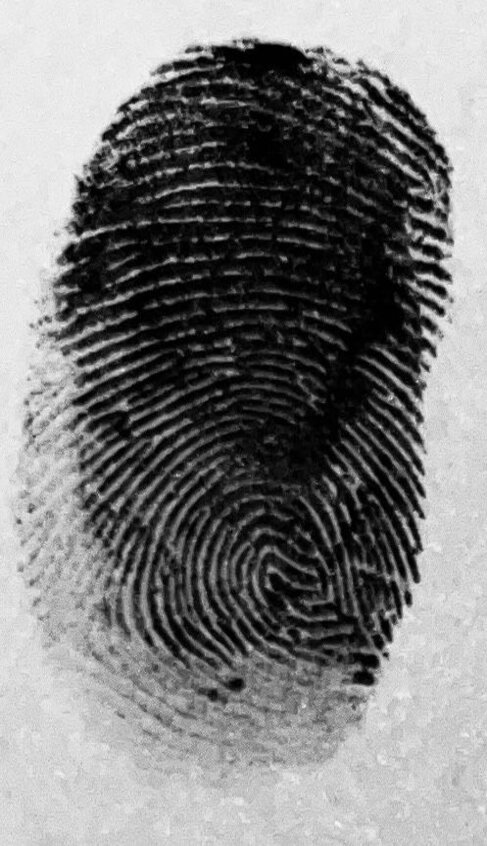

1/1 [==============================] - 0s 59ms/step
[[0.2680349 0.8249188]]
1
This is the same fingerprint


In [ ]:
input_image_path = input('Path of the image to be predicted: ')


input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('This is the same fingerprint')

else:

  print('This is not the same fingerprint')

In [ ]:
from tensorflow.keras.models import save_model

# Sauvegarder le modèle au format h5
model.save('FingerPrint_model.h5')


In [ ]:
#!rm -r /content/.ipynb_checkpoints


In [ ]:
import shutil

# Spécifiez le chemin du dossier .ipynb_checkpoints
dossier_checkpoints = '/content/Right_Fingerprint/.ipynb_checkpoints'

# Supprimez le dossier
shutil.rmtree(dossier_checkpoints, ignore_errors=True)
